# ML Workflow using Scikit Learn

## Intro to Scikit Learn 

This notebook contains some very useful functions of Sklearn Lib.

0. An end to end sk learn workflow.
1. Getting the Data Ready.
2. Choose the right estimator/algo.
3. Fit the model/algo and predict.
4. Evaluating a model.
5. Improve a Model.
6. Save and load a trained model.
7. Putting it all together

## 0. An end to end sk learn workflow

In [1]:
# 1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X(features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y(labels)
Y = heart_disease["target"]

In [3]:
# 2. Choose the right estimator/algo and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
clf.fit(X_train, Y_train);

In [10]:
# make a prediction
Y_preds = clf.predict(X_test)
Y_preds

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
Y_test

263    0
235    0
63     1
299    0
222    0
      ..
296    0
31     1
245    0
135    1
201    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the Model
clf.score(X_train,Y_train)

1.0

In [13]:
clf.score(X_test, Y_test)

0.7868852459016393

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))



              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [16]:
confusion_matrix(Y_test, Y_preds)

array([[21,  8],
       [ 5, 27]], dtype=int64)

In [18]:
accuracy_score(Y_test, Y_preds)

0.7868852459016393

In [21]:
# 5.Improve a model
#Try different amount of n_estimators(a type of hyperparameter for the model)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) *100:.2f}%")
    print("")     

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 73.77%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 77.05%



In [22]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [24]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)
                           

0.7704918032786885

## Now lets, Proceed with each and every step and explore them

## 1. Getting our data ready to be used for ML.

3 important things.
    1. Split the data into features(X) and labels(Y)
    2. Filling or disregard missing values.
    3. COnverting non numerical values to numerical values

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [23]:
X.shape

(303, 13)

In [24]:
len(heart_disease)

303

### 1.1 Make sure its all numerical

In [27]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Split into X and Y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

model.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
model.score(X_test, Y_test)

0.3235867221569877

### 1.2 If there are missing values

    1. Fill them with some values(imputation).
    2. Remove the samples with missing values.

In [41]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# create X and Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [45]:
# lets convert into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [46]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill Missing with data with pandas

In [47]:
# Fill the "Make" Column

car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "colour" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer"
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors"
car_sales_missing["Doors"].fillna(4, inplace=True)

In [48]:
# Check out dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# Remove rows with missing Price val
car_sales_missing.dropna(inplace=True)

In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing)

950

In [52]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [54]:
#Lets convert into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing val with Scikit Learn

In [56]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
# Drop the rows with nolabels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [60]:
# Fill missing val with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [61]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [66]:
# Now we have our data as numbers and filled.
# Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test) 


21.990196728583943

In [67]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right algo for our problem

Sk-learn uses estimator as another term for ml algo.

Classification:- predicting whether a sample is one thing or another 

Regression:- predicting a number

### 2.1 Picking a model for a Regression Problem

In [69]:
# import Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [70]:
# How many samples
len(boston_df)

506

In [72]:
# Ridge Regression model is tried
from sklearn.linear_model import Ridge

#Setup a Random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train, Y_train)

#Check the score of the Ridge model on test data
model.score(X_test, Y_test)

0.6662221670168522

In [74]:
# Lets improve on this Ridge Model using 
# Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

#Split the train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, Y_test)

0.8654448653350507

In [76]:
#Check the ridge model again
model.score(X_test, Y_test)

0.6662221670168522

### 2.2 Choosing an algo for Classification prblm

In [80]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
len(heart_disease)

303

In [82]:
# Trying Linear SVC

In [84]:
#import linearSVC
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Instantiate the Model(LinearSVC model)
clf = LinearSVC()
clf.fit(X_train, Y_train)

#Check the score
clf.score(X_test, Y_test)


E:\ml_project\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [85]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [86]:
## Random Forest Classifier vs Linear SVC
#import the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Instantiate the Model(Random Forest Classifier model)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

#Check the score
clf.score(X_test, Y_test)


0.8524590163934426

## 3. Fit the model and use it to make predictions.

### 3.1 Fitting the model to the data

In [89]:
## Random Forest Classifier vs Linear SVC
#import the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Instantiate the Model(Random Forest Classifier model)
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, Y_train)

#Check the score
clf.score(X_test, Y_test)


0.8524590163934426

In [87]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [88]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a Ml Model

     2 ways to predict
     1. predict()
     2. predict_proba()

In [90]:
# USe a trained model to make predictions
clf.predict(np.array([1,7, 8, 3, 4])) #This does not work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [91]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [92]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
# Compare predictions to true labels for further evaluation
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [95]:
clf.score(X_test, Y_test)

0.8524590163934426

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

#### Make predictions with predict_proba()


In [98]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [99]:
# Lets predict on the same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [100]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [101]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [102]:
# Predict() acn be used to regression models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

#Splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Instantiate the model
model = RandomForestRegressor().fit(X_train, Y_train)

#MAke predictions
Y_preds = model.predict(X_test)

In [103]:
Y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [104]:
np.array(Y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [105]:
# Compare the predictions to the true vals
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

2.136382352941176

## 4. Evaluating a model

3 ways to evaluate a model
 1. Estimator score methd.
 2. the scoring parameter.
 3. Problem-specific metric functions.

### 4.1 Evaluating using Score method

In [106]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)

RandomForestClassifier()

In [107]:
clf.score(X_train, Y_train)

1.0

In [108]:
clf.score(X_test, Y_test)

0.8524590163934426

In [109]:
# Lets do the same for Regression
# Predict() acn be used to regression models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

#Splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Instantiate the model
model = RandomForestRegressor().fit(X_train, Y_train)



In [110]:
model.score(X_test, Y_test)

0.8654448653350507

### 4.2 Evaluating using scoring parameter

In [112]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.8524590163934426

In [113]:
cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [114]:
cross_val_score(clf, X, Y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [115]:
np.random.seed(42)

#Single training and test split score
clf_single = clf.score(X_test, Y_test)

#Take mean of 5 fold cv score
clf_cross = np.mean(cross_val_score(clf,X,Y))

#Comparing both of them
clf_single, clf_cross

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [116]:
# Scorig parameter set to none by defau;t
cross_val_score(clf, X, Y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, Y,)



In [120]:
np.mean(cross_val_score)

0.8248087431693989

In [123]:
print(f"Heart Disease Classifier CV Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier CV Accuracy: 82.48%


#### Area under ROC curve

ROC compares a model's True +ve rate(TPR) and a False +ve rate(FPR)

TP:- model predicts 1 when truth is 1

FP:- model predicts 1 when truth is 0

TN:- model predicts 0 when truth is 0

FN:- model predicts 0 when truth is 1

In [124]:
# Create X_train, X_test....etc
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [126]:
from sklearn.metrics import roc_curve 

#Fit the classifier
clf.fit(X_train, Y_train)

#Make preds with probabilities
Y_probs = clf.predict_proba(X_test)

Y_probs[:10]



array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [128]:
Y_probs_positive = Y_probs[:, 1]
Y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [129]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

#Checking the rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

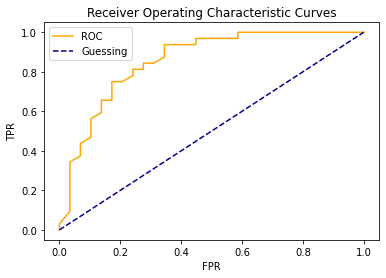

In [130]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    "Plots a ROC curve given fpr and tpr of model"
    
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic Curves")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


    
    


In [131]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_probs_positive)

0.8561422413793104

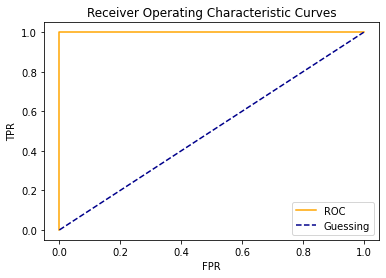

In [132]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

#### Confusion matrix

its a way to compare the labels a model predicts and the actual labels it was supposed to predict.




In [133]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [134]:
#Visulazing the matrix

pd.crosstab(Y_test,
           Y_preds,
           rownames=["Actual Labesl"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Labesl,,
0,24,5
1,8,24


In [135]:
22+7+8+24

61

In [136]:
len(Y_preds)

61

In [138]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\ml_project\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         163 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0




seaborn-0.10.1       | 163 KB    |            |   0% 
seaborn-0.10.1       | 163 KB    | 9          |  10% 
seaborn-0.10.1       | 163 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


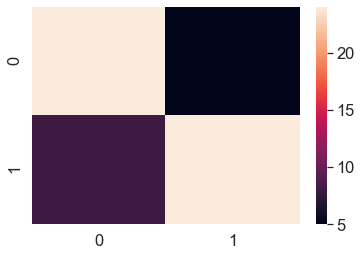

In [139]:
# Make our confusion matrix visual with seaborn heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat)

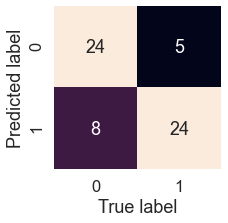

In [143]:
def plot_conf_mat(conf_mat):
    "Plots a confusion matrix using seaborn"
    
    fig, axe = plt.subplots(figsize=(3, 3))
    axe = sns.heatmap(conf_mat,
                      annot = True,
                      cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(conf_mat)

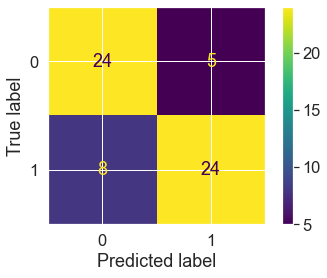

In [147]:
#Visualizing confusion matrix using sklearn confusion matrix plotting lib
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, Y_test)

#### Classification report



In [148]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [152]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict = True))   

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression evaluation metrics

1. R^2 or coefficient of determination
2. MAE
3. MSE


### R^2

Compare model's prediction to the mean of targets.

In [153]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [154]:
model.score(X_test, Y_test)

0.8654448653350507

In [155]:
from sklearn.metrics import r2_score

# Fill an array with Y_test mean

Y_test_mean = np.full(len(Y_test), Y_test.mean())
Y_test.mean()

21.488235294117644

In [156]:
Y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [157]:
r2_score(Y_test, Y_test_mean)

0.0

In [158]:
r2_score(Y_test, Y_test)

1.0

### MAE

MAE is the Average of the absolute error of our predicted values to the actual values

In [159]:
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_preds)
mae

2.136382352941176

In [160]:
df = pd.DataFrame(data={"actual values": Y_test,
                       "predicted values": Y_preds,
                       "differences": Y_preds-Y_test})
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


### MSE


In [161]:
from sklearn.metrics import mean_squared_error

Y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
mse

9.867437068627442

In [162]:
# Calculate mse by code only.
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

**Minimize MAE, MSE while maximizing R^2**

### 4.23 Using Scoring Parameter

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(7)

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

clf = RandomForestClassifier()

In [168]:
np.random.seed(7)
cv_acc = cross_val_score(clf, X, Y)
cv_acc

array([0.7704918 , 0.8852459 , 0.78688525, 0.83333333, 0.75      ])

In [169]:
print(f"THe cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

THe cross validated accuracy is : 80.52%


In [170]:
np.random.seed(7)
cv_acc = cross_val_score(clf, X, Y, scoring="accuracy")
print(f"THe cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

THe cross validated accuracy is : 80.52%


In [172]:
# Precision
cv_precision = cross_val_score(clf, X, Y, scoring = "precision")
np.mean(cv_precision)

0.835980871331915

In [173]:
#Recall
cv_recall = cross_val_score(clf, X, Y, scoring = "recall")
np.mean(cv_recall)

0.8666666666666666

In [174]:
#f1
cv_f1 = cross_val_score(clf, X, Y, scoring = "f1")
np.mean(cv_f1)

0.8292393661569522

***For regression model***

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(7)

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

model = RandomForestRegressor()

In [177]:
np.random.seed(7)
cv_r2 = cross_val_score(model, X, Y)
np.mean(cv_r2)

0.6179678382524438

In [179]:
#MAE
cv_mae = cross_val_score(model, X, Y, scoring = "neg_mean_absolute_error")
cv_mae

array([-2.1315098 , -2.62550495, -3.39283168, -3.72936634, -3.03264356])

In [181]:
#MSE
cv_mse = cross_val_score(model, X, Y, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-21.94588815618325

### 4.3 Using evaluation metrics as Sk functions

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

Y_preds = clf.predict(X_test)

#Now lets Evaluate
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Y_test, Y_preds)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_preds)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, Y_preds)*100:.2f}%")
print(f"F1: {f1_score(Y_test, Y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression Evaluation functions**

In [186]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
Y = boston_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

Y_preds = model.predict(X_test)

#Now lets Evaluate
print("Regression model evaluation")
print(f"R2: {r2_score(Y_test, Y_preds)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_preds)}")
print(f"MSE: {mean_squared_error(Y_test, Y_preds)}")

Regression model evaluation
R2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving our model

1st preds = baseline preds
1st model = baseline model

From a data perspective:
    Could we collect more data?

From a model perspective:
    Is there a better model?
    Can we improve the current model?
        
Parameters = model finds patterns onits own
hyperparameters = settings on a model you can adjust

In [188]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()



In [189]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by brute force

Lets make 3 sets: training, validation, test.

lets adjust:
    'max_depth'
    'max_features'
    'min_samples_leaf'
    'min_samples_split'
    'n_estimators'

In [195]:
def evaluate_preds(Y_true, Y_preds):
    "Performs evaluation on Y_true vs Y_preds"
    
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 = f1_score(Y_true, Y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy *100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict 

In [196]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#making X and Y
X = heart_disease_shuffled.drop("target", axis = 1)
Y = heart_disease_shuffled["target"]

#Splitting into train, valid and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

#Make baseline preds
Y_preds_valid = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(Y_valid, Y_preds_valid)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [199]:
np.random.seed(42)

#Create a second classifier with diff hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, Y_train)

#make predictions 
Y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
metrics_2 = evaluate_preds(Y_valid, Y_preds_2)
metrics_2

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Tuning with RandomizedSearchCV

In [200]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

#Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantiate
clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10, #number of models to try
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [203]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [204]:
#Make predictions with the best hyperparameters
rs_Y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(Y_test, rs_Y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Tuning with GridSearchCV

In [205]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [207]:
6*5*2*3*3*5

2700

In [208]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [209]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

np.random.seed(42)

#Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, Y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   1.0s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [210]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [211]:
# Make predictions with the best hyperparametres
gs_Y_preds = gs_clf.predict(X_test)

#Evaluating our GSCV model
gs_metrics = evaluate_preds(Y_test, gs_Y_preds)


Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Lets compare our different models metrics

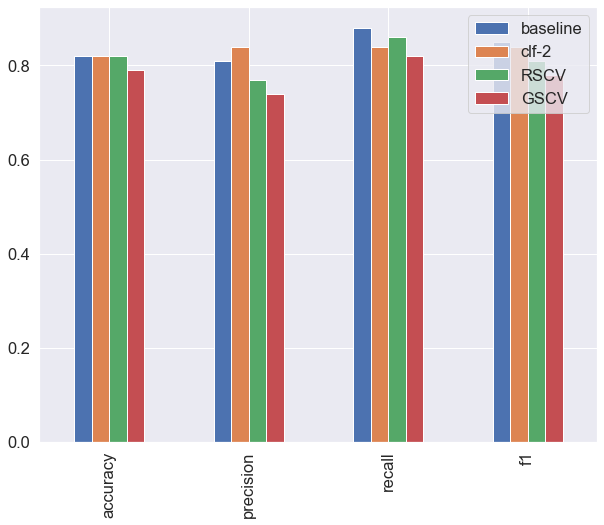

In [212]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf-2": metrics_2,
                                "RSCV": rs_metrics,
                                "GSCV": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

# THE BASELINE MODEL IS NEVER THE BEST MODEL

## 6. Saving and loading trained ML models

2 ways:-
    1. 'pickle' module
    2. 'joblib' module

**Pickle**

In [222]:
import pickle

#Save a model to file
pickle.dump(gs_clf, open("workflow_1.pkl", "wb"))

In [223]:
#Load a saved model
loaded_pickle_model = pickle.load(open("workflow_1.pkl", "rb"))

**Joblib**

In [224]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="workflow_2.joblib")

['workflow_2.joblib']

In [225]:
#Import a saved joblib model
loaded_joblib_model = load(filename = "workflow_2.joblib")

## 7. Putting it all together

**In all, We just need to assemble all of the mentioned steps together to use further ahead.**